In [1]:
import numpy as np

Init activation functions

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

init params

In [3]:
def init_params(layer_dims):
    params = {}
    np.random.seed(42)
    for l in range(1, len(layer_dims)):
        params[f"W{l}"] = np.random.rand(layer_dims[l], layer_dims[l-1])*0.01
        params[f"b{l}"] = np.zeros((layer_dims[l],1))
    return params

forward prop

In [4]:
def forward_prop(X,params):
    caches = []
    A = X
    L = len(params) // 2 # this gives the number of layers as we have both weights and bias matrices that double the layer count

    for l in range(1, L+1):
        W = params[f"W{l}"]
        b = params[f"b{l}"]
        Z = W@A + b
        A = sigmoid(Z)
        caches.append((A,W,b,Z))
    return A, caches


loss

In [5]:
def compute_loss(Y,A):
    m = Y.shape[1]
    loss = (-1/m)*(Y*np.log(A)+(1-Y)*np.log(1-A))
    return np.squeeze(loss)

back prop

In [6]:
def back_prop(X,Y,caches):
    grads = {}
    L = len(caches)
    m = X.shape[1]
    dZ = None

    for l in reversed(range(1, L+1)):
        A,W,b,Z = caches[l-1]
        if l == L:
            dZ = A - Y # this is the output layer
        else:
            dZ = caches[l][1].T@dZ*sigmoid_derivative(Z)
        
        grads[f"dW{l}"] = dZ@caches[l-2][0].T/m if l > 1 else dZ@X.T/m
        grads[f"db{l}"] = np.sum(dZ,axis=1,keepdims=True) / m
    
    return grads

optimise

In [7]:
def optimise(params, grads, learning_rate):
    L = len(params) // 2
    for l in range(1, L+1):
        params[f"W{l}"] -= learning_rate*grads[f"dW{l}"]
        params[f"b{l}"] -= learning_rate*grads[f"db{l}"]
    return params


training loop

In [8]:
def train(X, y, layer_dims, learning_rate=0.1, num_iterations=1000):
    params = init_params(layer_dims)
    for i in range(num_iterations):
        A, caches = forward_prop(X,params)
        loss = compute_loss(y,A)
        grads = back_prop(X,y,caches)
        params = optimise(params,grads,learning_rate)
        if i%100 == 0:
            print(f"Interation [{i}/{num_iterations}], Loss: {loss}")
    return params

In [9]:
# Generate toy data
np.random.seed(42)
X = np.random.randn(2, 500)  # 2 features, 500 samples

# Define labels based on a circular decision boundary
radius = 1.5  # Radius of the circle
Y = (X[1, :] > np.sin(2 * np.pi * X[0, :])).astype(int).reshape(1, 500)  # 1 if above the sine wave, else 0

# Define layer dimensions
layer_dims = [2, 100, 100, 1]  # 2 input features, 4 hidden units, 1 output unit

# Train the model
parameters = train(X, Y, layer_dims, learning_rate=0.1, num_iterations=1000)

Interation [0/1000], Loss: [0.00113121 0.00113118 0.00167856 0.00113117 0.00113135 0.00113134
 0.0016787  0.0011313  0.00113132 0.0016786  0.00113131 0.00113133
 0.00167862 0.0016784  0.00167844 0.00113128 0.00113133 0.00167857
 0.00167856 0.00113133 0.00167861 0.00113127 0.00167858 0.00113135
 0.00167852 0.00167849 0.0016784  0.00167866 0.0016786  0.00113137
 0.00113129 0.00167864 0.0011313  0.00167844 0.00113128 0.00113137
 0.00167857 0.00167844 0.00113131 0.00167859 0.0011312  0.00167855
 0.00113127 0.00113122 0.0016783  0.0016785  0.00113129 0.00167869
 0.00167868 0.00167843 0.00167866 0.00113133 0.00113126 0.00113124
 0.00113121 0.00113126 0.00167852 0.00113134 0.00167868 0.00167867
 0.00113131 0.00113118 0.00113131 0.00113139 0.00113117 0.0016787
 0.00167845 0.00167862 0.0016785  0.00167854 0.00167865 0.0011311
 0.00113128 0.00113121 0.0011314  0.00167851 0.00167865 0.00113126
 0.00167851 0.00113134 0.00113129 0.00167862 0.00113116 0.00113118
 0.00167857 0.00113131 0.00113127 0.0

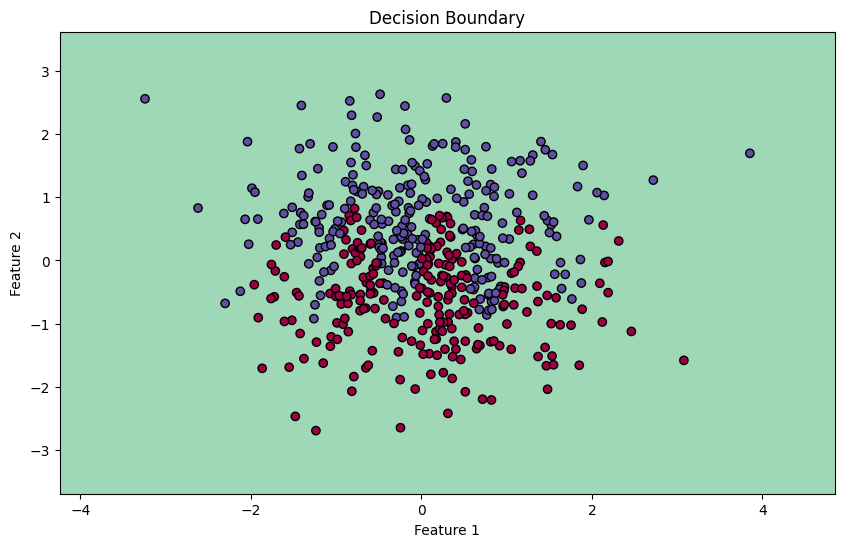

In [10]:
import matplotlib.pyplot as plt
# Generate a grid of points for visualization
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()].T
Z, _ = forward_prop(grid_points, parameters)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), edgecolors='k', cmap=plt.cm.Spectral)
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
